In [ ]:
# import packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

In [ ]:
# Load the data as a dataframe
stroke_df = pd.read_csv(DATA / "stroke.csv")

# check if the data is loaded correctly
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
stroke_df.info()

# drop smoking status unknown
stroke_df = stroke_df[stroke_df.smoking_status != 'Unknown']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
stroke_df = stroke_df.dropna()
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3426 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3426 non-null   int64  
 1   gender             3426 non-null   object 
 2   age                3426 non-null   float64
 3   hypertension       3426 non-null   int64  
 4   heart_disease      3426 non-null   int64  
 5   ever_married       3426 non-null   object 
 6   work_type          3426 non-null   object 
 7   Residence_type     3426 non-null   object 
 8   avg_glucose_level  3426 non-null   float64
 9   bmi                3426 non-null   float64
 10  smoking_status     3426 non-null   object 
 11  stroke             3426 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 348.0+ KB


Text(0, 0.5, 'Avg Glucose Level')

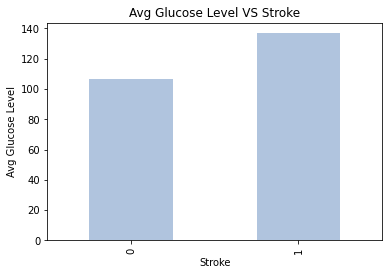

In [ ]:
bar_graph=stroke_df.groupby('stroke').mean().avg_glucose_level.plot(kind='bar', color='lightsteelblue')
plt.title("Avg Glucose Level VS Stroke")
plt.xlabel("Stroke")
plt.ylabel("Avg Glucose Level")

<AxesSubplot:xlabel='stroke'>

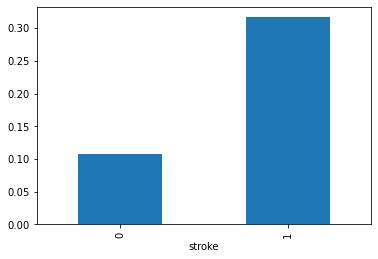

In [ ]:
bar_graph2=stroke_df.groupby('stroke').mean().hypertension.plot(kind='bar')
bar_graph2

Text(0, 0.5, 'Age')

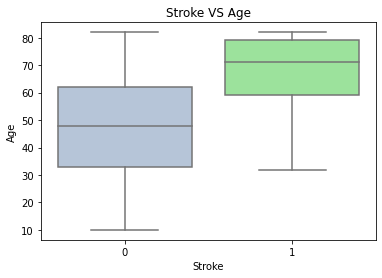

In [ ]:
colors = {0:'lightsteelblue', 1:'lightgreen'}
box=sns.boxplot(x='stroke', y='age', data=stroke_df, palette=colors)
plt.title("Stroke VS Age")
plt.xlabel("Stroke")
plt.ylabel("Age")


Text(0, 0.5, 'Age')

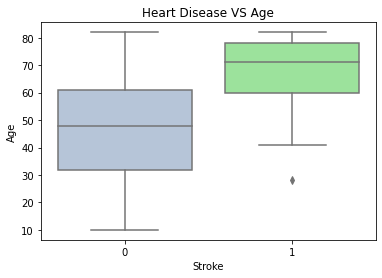

In [ ]:

box=sns.boxplot(x='heart_disease', y='age', data=stroke_df, palette=colors)
plt.title("Heart Disease VS Age")
plt.xlabel("Stroke")
plt.ylabel("Age")

Text(0, 0.5, 'Avg Glucose Levels')

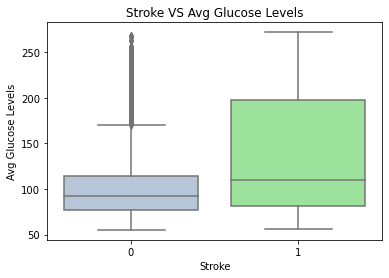

In [ ]:
box2=sns.boxplot(x='stroke', y='avg_glucose_level', data=stroke_df, palette=colors)
plt.title("Stroke VS Avg Glucose Levels")
plt.xlabel("Stroke")
plt.ylabel("Avg Glucose Levels")


Text(0, 0.5, 'BMI')

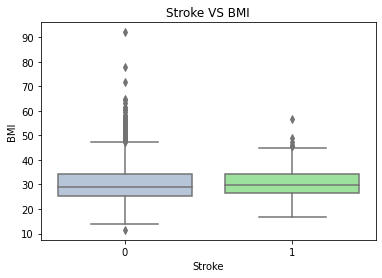

In [ ]:
box3=sns.boxplot(x='stroke', y='bmi', data=stroke_df, palette = colors)
plt.title("Stroke VS BMI")
plt.xlabel("Stroke")
plt.ylabel("BMI")

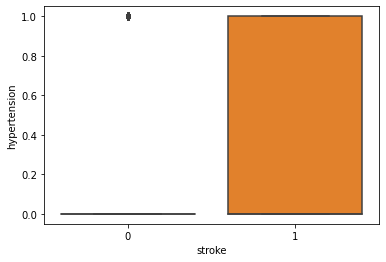

In [ ]:
box4=sns.boxplot(x='stroke', y='hypertension', data=stroke_df)

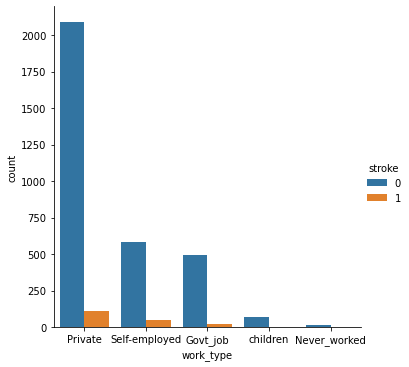

In [ ]:
job_type=sns.catplot(x='work_type', hue='stroke', data=stroke_df, kind='count')

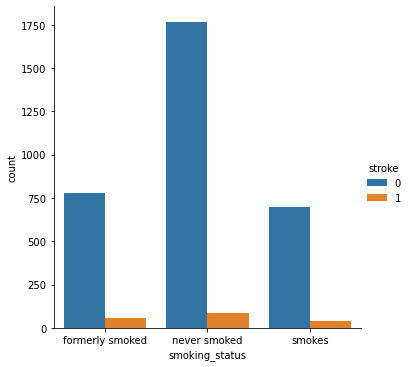

In [ ]:
smoking=sns.catplot(x='smoking_status', hue='stroke', data=stroke_df, kind='count')

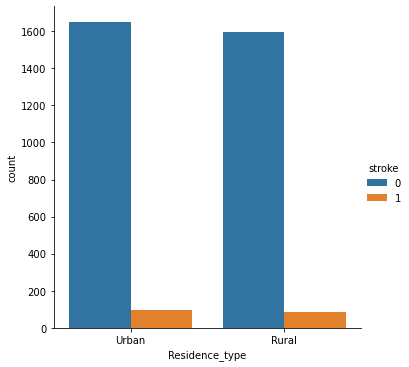

In [ ]:
Resi=sns.catplot(x='Residence_type', hue='stroke', data=stroke_df, kind='count')

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

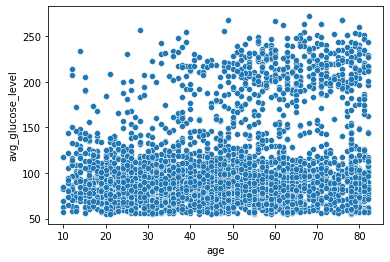

In [ ]:
sns.scatterplot(x='age', y='avg_glucose_level',data=stroke_df)

In [ ]:
# correlation matrix MAKE IT
corrMatrix = stroke_df.corr()
print(corrMatrix)

                         id       age  hypertension  heart_disease  \
id                 1.000000 -0.003491     -0.006697       0.015566   
age               -0.003491  1.000000      0.267098       0.260108   
hypertension      -0.006697  0.267098      1.000000       0.111707   
heart_disease      0.015566  0.260108      0.111707       1.000000   
avg_glucose_level  0.004326  0.233649      0.168673       0.143085   
bmi               -0.003862  0.079666      0.132635       0.001288   
stroke            -0.006565  0.242495      0.143647       0.138553   

                   avg_glucose_level       bmi    stroke  
id                          0.004326 -0.003862 -0.006565  
age                         0.233649  0.079666  0.242495  
hypertension                0.168673  0.132635  0.143647  
heart_disease               0.143085  0.001288  0.138553  
avg_glucose_level           1.000000  0.156404  0.140453  
bmi                         0.156404  1.000000  0.011673  
stroke                    

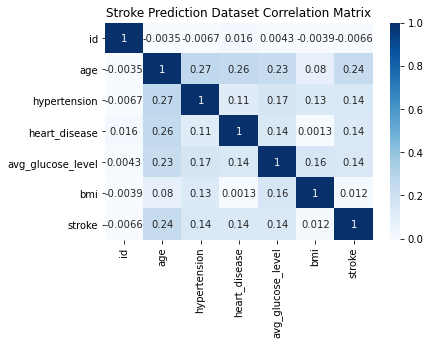

In [ ]:
sns.heatmap(corrMatrix, annot=True, cmap="Blues")
plt.title("Stroke Prediction Dataset Correlation Matrix")
plt.show()